In [24]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameteres=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=4,
        number_of_hidden_layers=16,
        epsilon=1e-5,
        number_of_samples_for_entropy_dual_estimation=2048,
        activation_function_name="Mish"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=1000,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
# model = model.load("../experiments_with_results/entropic_optimal_transport/Epsilon/1e_5/weights.pth", map_location=torch.device("cpu"))
_ = model.eval()

Epoch: 7, Objective: 4.293, LR: 0.009999:   1%|          | 6/1000 [00:21<59:06,  3.57s/it]  


KeyboardInterrupt: 

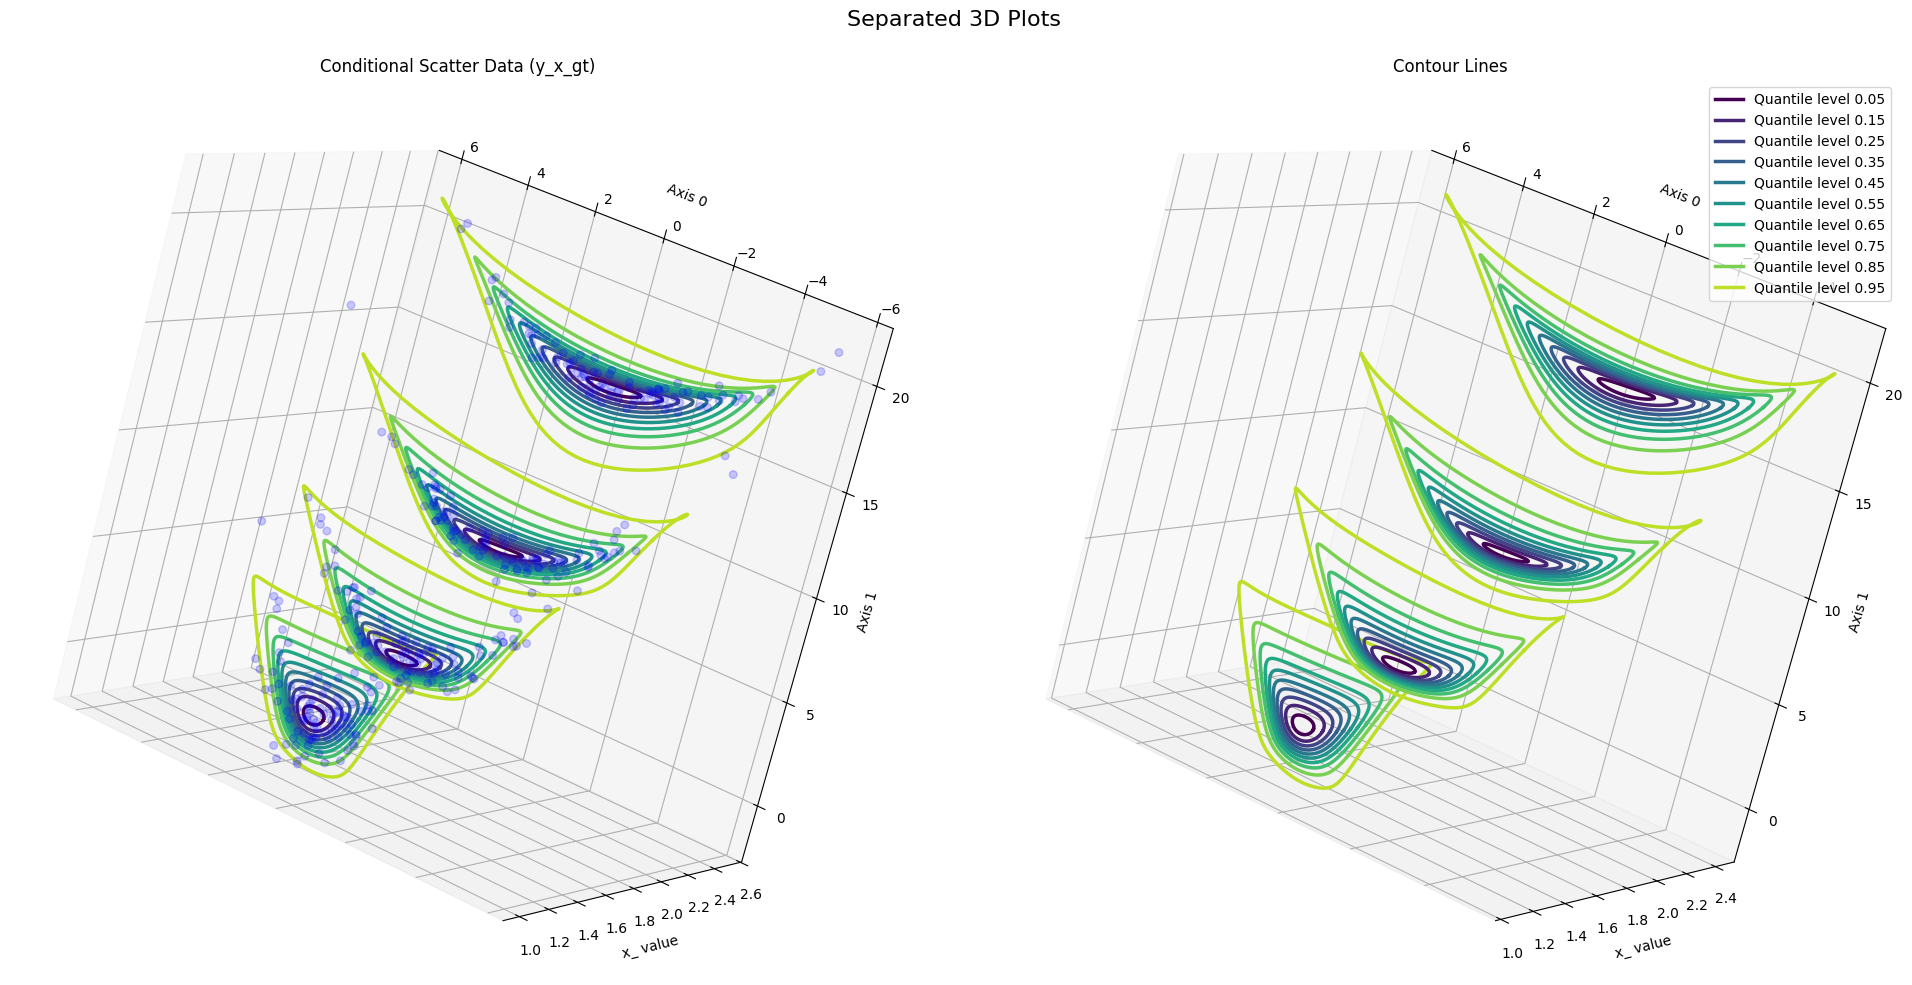

In [21]:
%matplotlib inline
from utils.plot import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=model, number_of_conditional_points=4, number_of_points_to_sample=100, tensor_parameteres=experiment.tensor_parameteres)

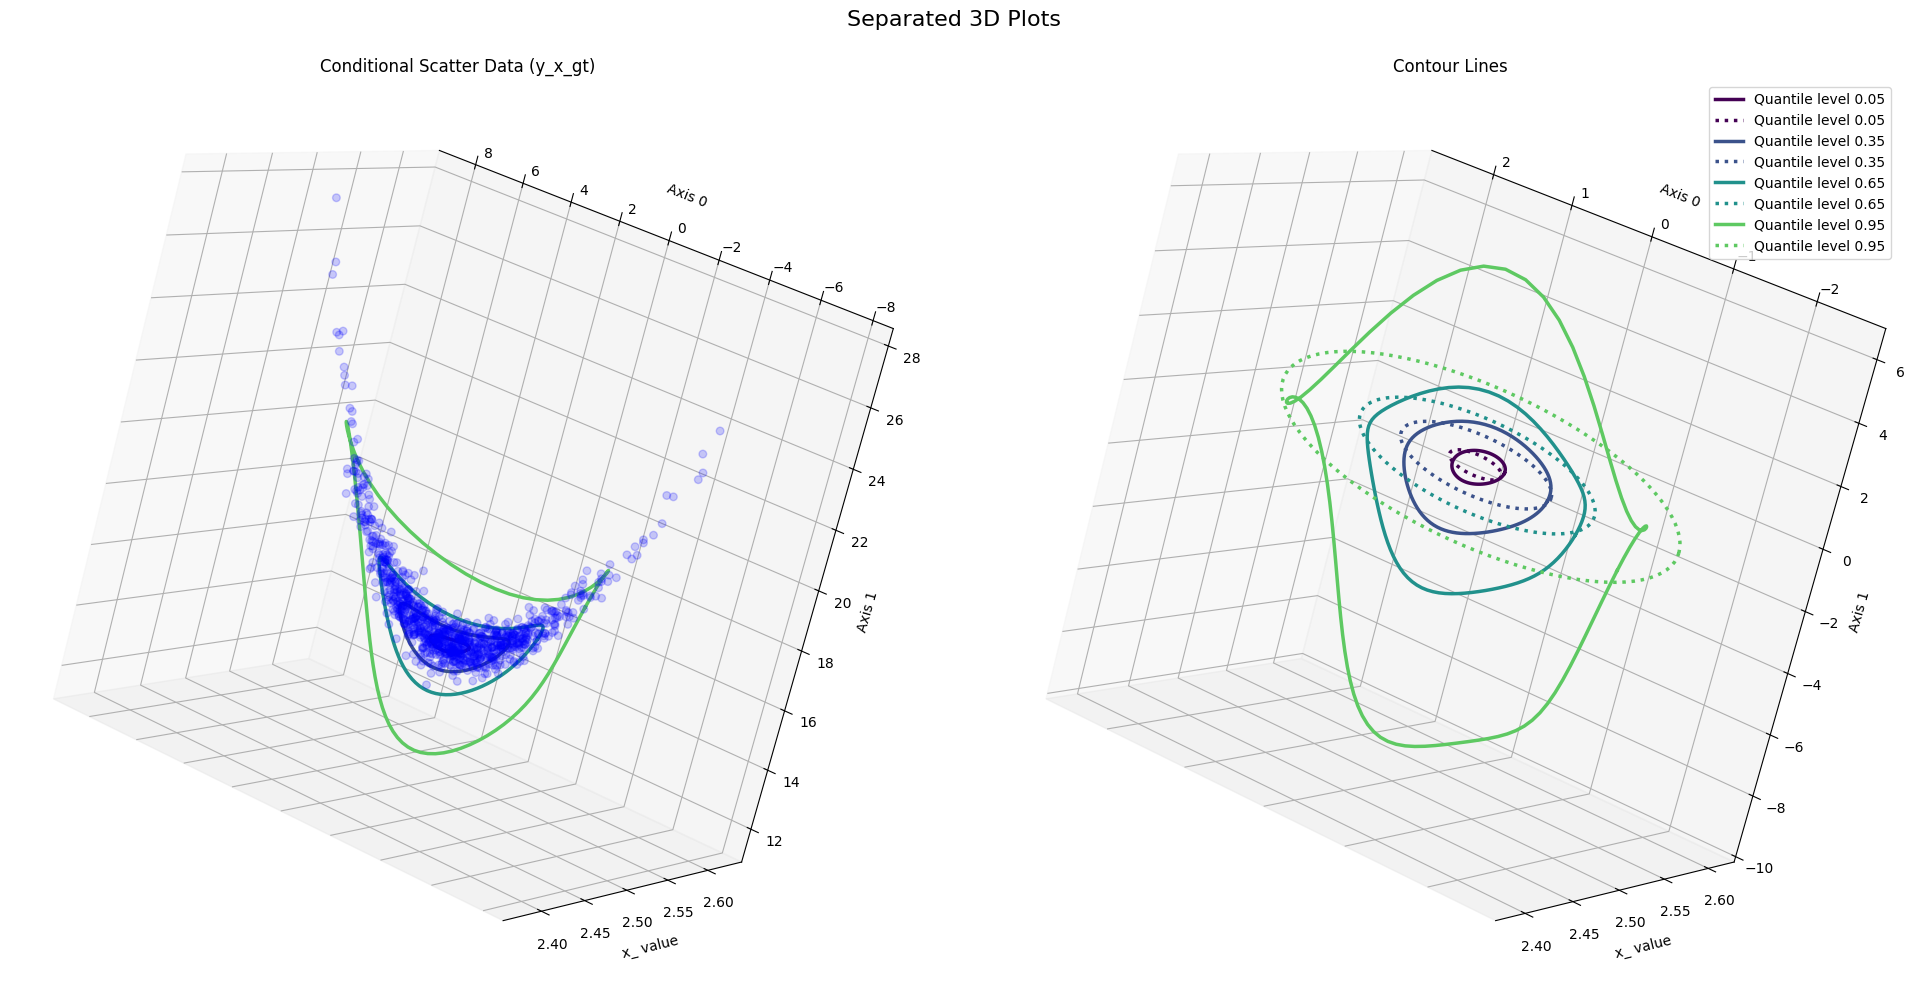

In [23]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_banana_dataset

plot_quantile_levels_from_banana_dataset(
    model=model,
    number_of_points_to_sample=1000,
    tensor_parameteres=experiment.tensor_parameteres,
    conditional_value=2.5,
    number_of_quantile_levels=4
)